## Problem statement  we are trying to webscrape 2 subreddit posts that have different words and build a classifier model to predict the model to find out how accurately can it predict words to be from a Tinder or OKcupid subreddit

### Build it on tinder subreddit and okccupid subreddit

## Project 3 1. Webscraping

### Classification models using Natural Language Processing (NLP)
1)Webscraping
2)Data Cleaning
3)Modelling

Description: Two different subreddits have been selected to be classified. They are namely:

1) POSTS From OKCUPID
2) POSTs From TINDER

We are trying to to find a model thats most accurate in predicting text that from either OKCUPID or tinder.

This will allow stakeholders to find out their apps are being talked more on subreddits.

### Webscraping using Reddit API

In [1]:
# import packages
import pandas as pd
import requests
import numpy as np
import time
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import nltk


import requests
import random
import time
import nltk
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import roc_curve, roc_auc_score

#### SELECT SUBREDDITS OKCUPID and TINDER

In [2]:
#TFR is okcupid
#tfts is tinder

TFR = 'https://www.reddit.com/r/OkCupid/.json'
TFTS = 'https://www.reddit.com/r/Tinder/.json'

### Webscraping

In [3]:
def get_posts(url,headers = {'User-agent':'Bleep borp bot 1.0'},loops=2):
    posts = []
    names = []
    titles = []
    subreddit = []
    aft_name=None

    for i in range(loops):
        if aft_name==None:
            params={}
        else:
            params={'after':aft_name}

        req = requests.get(url,params=params,headers=headers)

        if req.status_code == 200:
            the_json = req.json()
            for p in range(len(the_json['data']['children'])):
                names.append(the_json['data']['children'][p]['data']['name'])
                titles.append(the_json['data']['children'][p]['data']['title'])
                posts.append(the_json['data']['children'][p]['data']['selftext'])
                subreddit.append(the_json['data']['children'][p]['data']['subreddit'])
                aft_name = the_json['data']['after']
        else:
            print(res.status_code)
            break
            
        time.sleep(np.random.randint(1,5))
    
    posts_df = pd.DataFrame({'names':names,
                         'titles':titles,
                         'posts':posts,
                         'subreddit':subreddit},columns = ['names','titles','posts','subreddit'])
    
    return posts_df

In [4]:
TFR_df = get_posts(TFR,loops=40)

In [5]:
TFTS_df = get_posts(TFTS,loops=40)

In [6]:

len(TFR_df)

997

In [7]:
len(TFTS_df)

991

Removing duplicates as Reddit API limits requests of post to 1000 only and checking how much data is collected:
combined the titles and posts  and dropped duplicates.

In [8]:
TFR_df['text'] = TFR_df['titles'] + TFR_df['posts']
TFTS_df['text'] = TFTS_df['titles'] + TFTS_df['posts']
TFR_df = TFR_df.drop_duplicates(subset='text',keep='first')
TFTS_df = TFTS_df.drop_duplicates(subset='text',keep='first')


In [9]:
len(TFR_df)

906

In [10]:
len(TFTS_df)

734

In [11]:
TFR_df.head()

,names,titles,posts,subreddit,text
0,t3_iq7hgj,Critique-Any-Section Thursdays,Got a profile section you're wondering about o...,OkCupid,Critique-Any-Section ThursdaysGot a profile se...
1,t3_ipsl58,Hmmm,,OkCupid,Hmmm
2,t3_iq7eit,[cj] therapy Thursday,I went to lunch with the kids yesterday and we...,OkCupid,[cj] therapy ThursdayI went to lunch with the ...
3,t3_iq7nq5,"Aversion to names from family, exes, etc.",There is a woman I think would be a good match...,OkCupid,"Aversion to names from family, exes, etc.There..."
4,t3_iq648s,Want a rich date? She can help you,,OkCupid,Want a rich date? She can help you


In [12]:
TFTS_df.head()

,names,titles,posts,subreddit,text
0,t3_iot6ix,"Profile Review - Week of September 08, 2020",Post information about you/your profile here a...,Tinder,"Profile Review - Week of September 08, 2020Pos..."
1,t3_iog42t,"Story Time - Week of September 07, 2020",Feel free to use this thread to discuss all of...,Tinder,"Story Time - Week of September 07, 2020Feel fr..."
2,t3_iq13ij,"If you make a mistake, why not just keep going?",,Tinder,"If you make a mistake, why not just keep going?"
3,t3_ipqi0t,We have the same energy,,Tinder,We have the same energy
4,t3_iq054b,"Ah, the Chosen One",,Tinder,"Ah, the Chosen One"


In [13]:
TFR_df.to_csv ('TFR_df.csv')
TFTS_df.to_csv('TFTS_df.csv')

## Project 3 2. Data Cleaning and Exploratory Data Analysis

### Classification models using Natural Language Processing (NLP)¶
2.1 Data Reading/Cleaning
2.2 Exploratory Data Analysis
2.3 Adressing stopwords, Lemmetization/Stemming
2.4 Visualizations


Importing relevant libraries for data cleaning and EDA:

In [14]:
TFR_df = pd.read_csv('TFR_df.csv')
TFTS_df = pd.read_csv('TFTS_df.csv')

In [15]:
TFR_df.isnull().sum()

Unnamed: 0      0
names           0
titles          0
posts         391
subreddit       0
text            0
dtype: int64

In [16]:
TFTS_df.isnull().sum()


Unnamed: 0      0
names           0
titles          0
posts         600
subreddit       0
text            0
dtype: int64


There are no null values so we can proceed on in the next step of our Data Cleaning!

Now, both dataframes will be combined into one singular data frame, then cleaned and shuffled so that we can use it for classification later.

In [17]:
combined_df = pd.concat([TFR_df,TFTS_df]).reset_index(drop=True)
combined_df = shuffle(combined_df).reset_index(drop=True)
combined_df.head()


,Unnamed: 0,names,titles,posts,subreddit,text
0,491,t3_inzv03,idk what she was expecting me to say 🤕,NaN,Tinder,idk what she was expecting me to say 🤕
1,843,t3_hz6lt2,Do you believe in fate?,"There is this guy I know, and admittedly have ...",OkCupid,Do you believe in fate?There is this guy I kno...
2,82,t3_in4wi7,Does OKC surface likes to the top of the swipe...,I found Tinder and Bumble would surface people...,OkCupid,Does OKC surface likes to the top of the swipe...
3,614,t3_i67md3,"are you comfortable video chatting, can you be...",NaN,OkCupid,"are you comfortable video chatting, can you be..."
4,552,t3_i8pacc,any of those affluent ladies hanging around he...,NaN,OkCupid,any of those affluent ladies hanging around he...


In [18]:
# fill NA values for posts of tinder where people only posted about titles and not posts

combined_df['posts'] = combined_df['posts'].fillna('')
combined_df.head()

,Unnamed: 0,names,titles,posts,subreddit,text
0,491,t3_inzv03,idk what she was expecting me to say 🤕,,Tinder,idk what she was expecting me to say 🤕
1,843,t3_hz6lt2,Do you believe in fate?,"There is this guy I know, and admittedly have ...",OkCupid,Do you believe in fate?There is this guy I kno...
2,82,t3_in4wi7,Does OKC surface likes to the top of the swipe...,I found Tinder and Bumble would surface people...,OkCupid,Does OKC surface likes to the top of the swipe...
3,614,t3_i67md3,"are you comfortable video chatting, can you be...",,OkCupid,"are you comfortable video chatting, can you be..."
4,552,t3_i8pacc,any of those affluent ladies hanging around he...,,OkCupid,any of those affluent ladies hanging around he...


In [19]:
#Apply lower case to all the words in subreddit.
combined_df['subreddit'] = combined_df['subreddit'].apply(lambda x: x.lower())

### 2.2 Exploratory Data Analysis
Then we can check for the % of subreddit posts from each subreddit.

In [20]:
len(combined_df)

1640

In [21]:
combined_df.subreddit.value_counts(normalize=True)

okcupid    0.552439
tinder     0.447561
Name: subreddit, dtype: float64

## Data cleaning

Next, the data in the titles and posts columns should be cleaned and tokenized so that we can train our classification model after. To do that, the function below is written to be iterated through our combined dataframe to remove all unwanted things such as html tags, spaces and punctuation etc and then split into a list.

In [22]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import nltk
import re
from wordcloud import WordCloud

In [23]:
#define function to clean text with regex and split words

def string_clean(text):
    
    # Remove all HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove non-letters.
    text = re.sub("[^a-zA-Z]", " ", text)
    # Remove all URL tags
    text = re.sub(r'^https?:\/\/.*[\r\n]*','',text)
    
    # Keep text without punctuation
    text = re.sub(r'[^\w\s]','',text)
    
    # convert text to lowercase
    text = text.strip().lower()

    # split text into a list of words
    token_text = re.split('\W+',text)
    
    return token_text

Then, we can go ahead and apply this function to both our posts and titles to return us the tokens of each corresponding column.

In [24]:
# tokenize posts and titles
combined_df['p_tokenized'] = combined_df['posts'].apply(lambda x: string_clean(x))
combined_df['t_tokenized'] = combined_df['titles'].apply(lambda x: string_clean(x))

In [25]:
#check the shape of the combined df
combined_df.head()

,Unnamed: 0,names,titles,posts,subreddit,text,p_tokenized,t_tokenized
0,491,t3_inzv03,idk what she was expecting me to say 🤕,,tinder,idk what she was expecting me to say 🤕,[],"[idk, what, she, was, expecting, me, to, say]"
1,843,t3_hz6lt2,Do you believe in fate?,"There is this guy I know, and admittedly have ...",okcupid,Do you believe in fate?There is this guy I kno...,"[there, is, this, guy, i, know, and, admittedl...","[do, you, believe, in, fate]"
2,82,t3_in4wi7,Does OKC surface likes to the top of the swipe...,I found Tinder and Bumble would surface people...,okcupid,Does OKC surface likes to the top of the swipe...,"[i, found, tinder, and, bumble, would, surface...","[does, okc, surface, likes, to, the, top, of, ..."
3,614,t3_i67md3,"are you comfortable video chatting, can you be...",,okcupid,"are you comfortable video chatting, can you be...",[],"[are, you, comfortable, video, chatting, can, ..."
4,552,t3_i8pacc,any of those affluent ladies hanging around he...,,okcupid,any of those affluent ladies hanging around he...,[],"[any, of, those, affluent, ladies, hanging, ar..."



We can see that the columns are not ordered properly and it is hard to visualize these data thus we rearrange the order of the columns.

In [26]:
#Rearrange the order of columns
combined_df = combined_df[['names','titles','t_tokenized','posts','p_tokenized','subreddit']]

In [27]:
combined_df.head()

,names,titles,t_tokenized,posts,p_tokenized,subreddit
0,t3_inzv03,idk what she was expecting me to say 🤕,"[idk, what, she, was, expecting, me, to, say]",,[],tinder
1,t3_hz6lt2,Do you believe in fate?,"[do, you, believe, in, fate]","There is this guy I know, and admittedly have ...","[there, is, this, guy, i, know, and, admittedl...",okcupid
2,t3_in4wi7,Does OKC surface likes to the top of the swipe...,"[does, okc, surface, likes, to, the, top, of, ...",I found Tinder and Bumble would surface people...,"[i, found, tinder, and, bumble, would, surface...",okcupid
3,t3_i67md3,"are you comfortable video chatting, can you be...","[are, you, comfortable, video, chatting, can, ...",,[],okcupid
4,t3_i8pacc,any of those affluent ladies hanging around he...,"[any, of, those, affluent, ladies, hanging, ar...",,[],okcupid


This is much better organized now! However, we can furthur simplify our data by removing stopwords! Similar to what we did above, we will write a function to do this and apply it to our newly created tokenized columns.


### 2.3 Adressing stopwords, Lemmetization/Stemming

In [28]:
#define function for removing stop words and using stopwords
def remove_stop_words(text):
    
    en_stopwords = list(nltk.corpus.stopwords.words('english'))
    text = [word for word in text if word not in en_stopwords]
    
    return text

In [29]:
combined_df['p_stopped'] = combined_df['p_tokenized'].apply(lambda x: remove_stop_words(x))
combined_df['t_stopped'] = combined_df['t_tokenized'].apply(lambda x: remove_stop_words(x))


# Rearranging columns for visibility again
combined_df = combined_df[['names','titles','t_tokenized','t_stopped','posts','p_tokenized','p_stopped','subreddit']]

In [30]:
combined_df.head()

,names,titles,t_tokenized,t_stopped,posts,p_tokenized,p_stopped,subreddit
0,t3_inzv03,idk what she was expecting me to say 🤕,"[idk, what, she, was, expecting, me, to, say]","[idk, expecting, say]",,[],[],tinder
1,t3_hz6lt2,Do you believe in fate?,"[do, you, believe, in, fate]","[believe, fate]","There is this guy I know, and admittedly have ...","[there, is, this, guy, i, know, and, admittedl...","[guy, know, admittedly, feelings, together, un...",okcupid
2,t3_in4wi7,Does OKC surface likes to the top of the swipe...,"[does, okc, surface, likes, to, the, top, of, ...","[okc, surface, likes, top, swipe, pile, like, ...",I found Tinder and Bumble would surface people...,"[i, found, tinder, and, bumble, would, surface...","[found, tinder, bumble, would, surface, people...",okcupid
3,t3_i67md3,"are you comfortable video chatting, can you be...","[are, you, comfortable, video, chatting, can, ...","[comfortable, video, chatting]",,[],[],okcupid
4,t3_i8pacc,any of those affluent ladies hanging around he...,"[any, of, those, affluent, ladies, hanging, ar...","[affluent, ladies, hanging, around, absolutely...",,[],[],okcupid


Last but not least, we can simplify our data one more time by lemmatizing our word list.

Lemmatizing and Stemming are two forms of shortening words so we can combine similar forms of the same word. When we "lemmatize" data, we take words and attempt to return their lemma, or the base/dictionary form of a word e.g. destroying when lemmatized becomes destroy.

First, we import and intantiate our lemmatizer and stemmer

In [31]:
# importing wordlemmatizer and stemmer to stem and lemmatize our words
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

lemmatizer = WordNetLemmatizer()
p_stemmer = PorterStemmer()


Then, we write a function again to apply our lemmatizer and stemmer to our combined dataframe:

In [32]:
# create function to stemmatize words
def lemmatize_stemmer(text):
    
    text = [lemmatizer.lemmatize(i) for i in text]
    text = [p_stemmer.stem(i) for i in text]
    
    return text

In [33]:

combined_df['p_final'] = combined_df['p_stopped'].apply(lambda x: remove_stop_words(x))
combined_df['t_final'] = combined_df['t_stopped'].apply(lambda x: remove_stop_words(x))

# Rearranging columns for visibility again
combined_df = combined_df[['names','titles','t_tokenized','t_stopped','t_final','posts','p_tokenized','p_stopped','p_final','subreddit']]

In [34]:
combined_df.head()

,names,titles,t_tokenized,t_stopped,t_final,posts,p_tokenized,p_stopped,p_final,subreddit
0,t3_inzv03,idk what she was expecting me to say 🤕,"[idk, what, she, was, expecting, me, to, say]","[idk, expecting, say]","[idk, expecting, say]",,[],[],[],tinder
1,t3_hz6lt2,Do you believe in fate?,"[do, you, believe, in, fate]","[believe, fate]","[believe, fate]","There is this guy I know, and admittedly have ...","[there, is, this, guy, i, know, and, admittedl...","[guy, know, admittedly, feelings, together, un...","[guy, know, admittedly, feelings, together, un...",okcupid
2,t3_in4wi7,Does OKC surface likes to the top of the swipe...,"[does, okc, surface, likes, to, the, top, of, ...","[okc, surface, likes, top, swipe, pile, like, ...","[okc, surface, likes, top, swipe, pile, like, ...",I found Tinder and Bumble would surface people...,"[i, found, tinder, and, bumble, would, surface...","[found, tinder, bumble, would, surface, people...","[found, tinder, bumble, would, surface, people...",okcupid
3,t3_i67md3,"are you comfortable video chatting, can you be...","[are, you, comfortable, video, chatting, can, ...","[comfortable, video, chatting]","[comfortable, video, chatting]",,[],[],[],okcupid
4,t3_i8pacc,any of those affluent ladies hanging around he...,"[any, of, those, affluent, ladies, hanging, ar...","[affluent, ladies, hanging, around, absolutely...","[affluent, ladies, hanging, around, absolutely...",,[],[],[],okcupid


In [35]:
combined_df['final_combined'] = combined_df['t_final'] + combined_df['p_final']

In [36]:

combined_df.head()

,names,titles,t_tokenized,t_stopped,t_final,posts,p_tokenized,p_stopped,p_final,subreddit,final_combined
0,t3_inzv03,idk what she was expecting me to say 🤕,"[idk, what, she, was, expecting, me, to, say]","[idk, expecting, say]","[idk, expecting, say]",,[],[],[],tinder,"[idk, expecting, say, ]"
1,t3_hz6lt2,Do you believe in fate?,"[do, you, believe, in, fate]","[believe, fate]","[believe, fate]","There is this guy I know, and admittedly have ...","[there, is, this, guy, i, know, and, admittedl...","[guy, know, admittedly, feelings, together, un...","[guy, know, admittedly, feelings, together, un...",okcupid,"[believe, fate, guy, know, admittedly, feeling..."
2,t3_in4wi7,Does OKC surface likes to the top of the swipe...,"[does, okc, surface, likes, to, the, top, of, ...","[okc, surface, likes, top, swipe, pile, like, ...","[okc, surface, likes, top, swipe, pile, like, ...",I found Tinder and Bumble would surface people...,"[i, found, tinder, and, bumble, would, surface...","[found, tinder, bumble, would, surface, people...","[found, tinder, bumble, would, surface, people...",okcupid,"[okc, surface, likes, top, swipe, pile, like, ..."
3,t3_i67md3,"are you comfortable video chatting, can you be...","[are, you, comfortable, video, chatting, can, ...","[comfortable, video, chatting]","[comfortable, video, chatting]",,[],[],[],okcupid,"[comfortable, video, chatting, ]"
4,t3_i8pacc,any of those affluent ladies hanging around he...,"[any, of, those, affluent, ladies, hanging, ar...","[affluent, ladies, hanging, around, absolutely...","[affluent, ladies, hanging, around, absolutely...",,[],[],[],okcupid,"[affluent, ladies, hanging, around, absolutely..."



We can now finally save this into a csv file so that it can be used in our final notebook where we will be doing our modelling.

In [37]:
# save combined df to a csv file

combined_df.to_csv('combined_df.csv')


### 2.4 Visualizations (Extra)
Defining some functions to help us in our visualizations later.

In [38]:
def word_counter(data):
    word_counts = {}
    words = data.split()
    
    for word in words:
        if word not in word_dict_counts:
            word_counts[word] = 1
        else:
            word_counts[word] += 1
            
    return word_counts


In [39]:
from wordcloud import WordCloud

## For a start, we plot the WordCloud image for the top 100 words that we see in our posts from OKCUPID

(-0.5, 999.5, 749.5, -0.5)

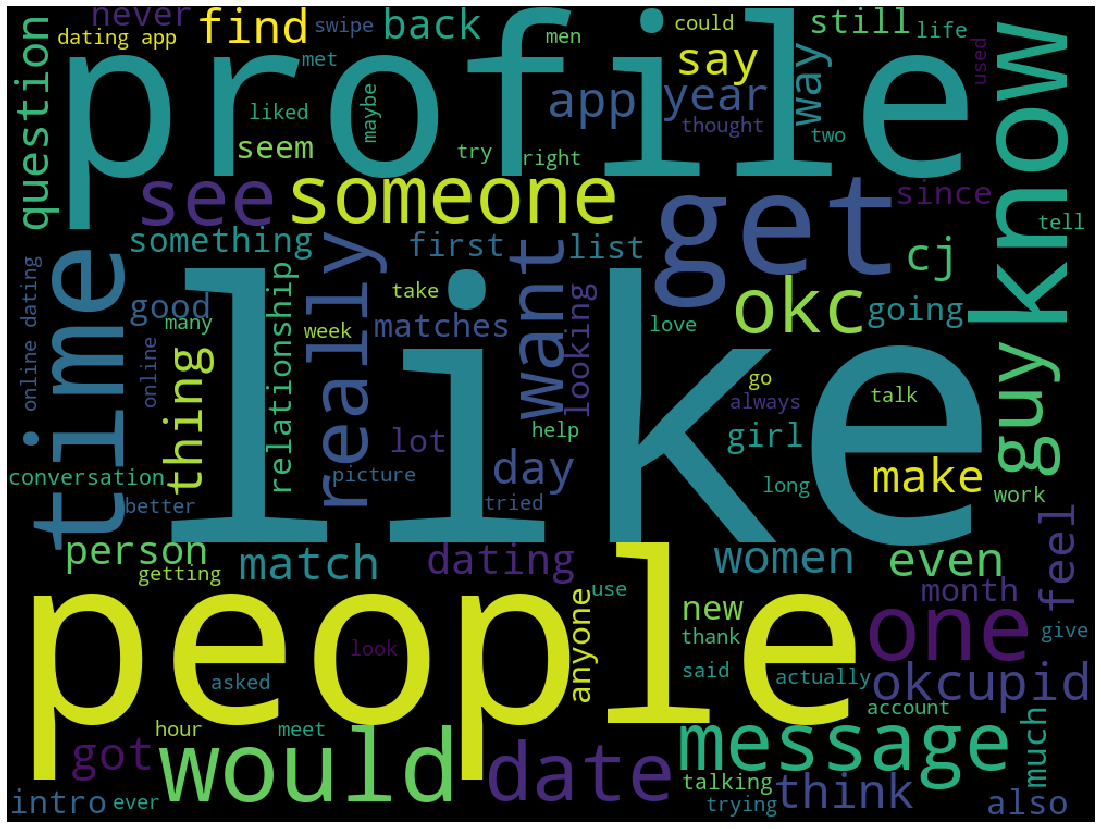

In [40]:
TFR_text = ' '

en_stopwords = list(nltk.corpus.stopwords.words('english'))

for x in combined_df[combined_df['subreddit'] == 'okcupid']['final_combined']: 
    for words in x: 
        TFR_text = TFR_text + words + ' '

TFR_wc = WordCloud(max_words= 100,
                      width = 1000, 
                      height = 750,
                      background_color ='black',
                      stopwords=en_stopwords, 
                      contour_width=3, 
                      contour_color='red',
                      min_font_size = 10).generate(TFR_text) 
                      
plt.figure(figsize = (20, 15)) 
plt.imshow(TFR_wc) 
plt.axis("off")

### count top 40 words  in okcupid subreddit

           Frequency
Word                
'               1089
.                483
’                345
,                329
like             288
?                190
people           189
get              177
would            155
know             149
really           140
time             137
see              132
profile          122
want             114
one              114
even             112
someone          106
dating           103
got               91
think             90
find              89
message           89
first             88
(                 87
okc               82
anyone            81
app               80
still             76
likes             73
okcupid           73
something         72
new               71
date              71
feel              69
make              69
person            69
never             68
since             67
things            66


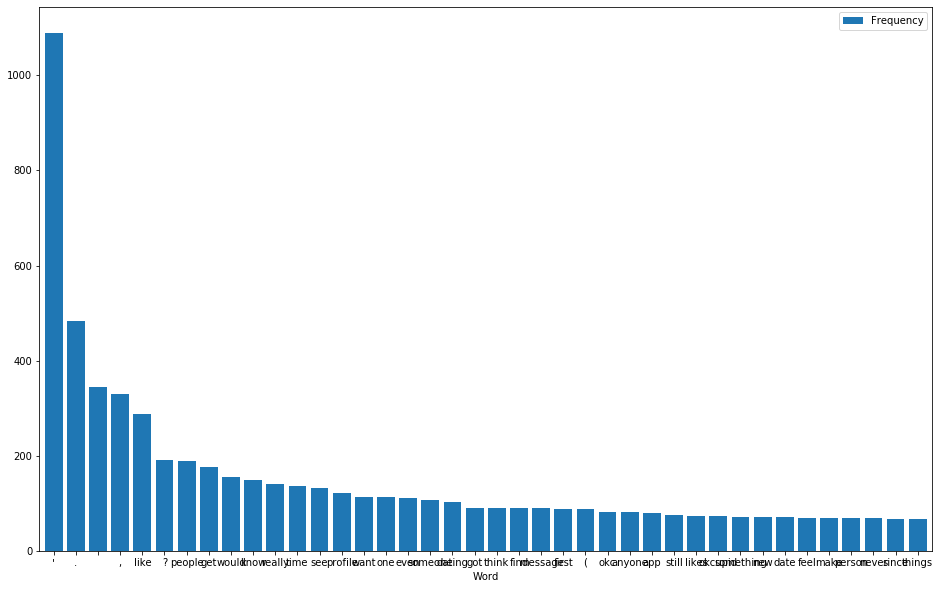

In [41]:
from collections import Counter
import pandas as pd
import nltk

top_N = 40

df = pd.read_csv('TFR_df.csv',
                 usecols=['subreddit','posts'])

stopwords = nltk.corpus.stopwords.words('english')
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (df.posts
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

# plot
rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)

### count top 40 words in tinder subreddit df

         Frequency
Word              
'              208
’              131
.               86
,               75
tinder          72
like            67
get             62
got             41
?               40
know            37
people          35
would           33
matches         30
one             29
new             29
account         27
profile         26
first           26
getting         24
match           24
anyone          24
want            23
really          23
see             22
even            22
time            21
also            20
someone         20
good            20
days            20
likes           20
(               19
going           19
back            19
date            19
day             19
said            19
think           18
since           18
looking         18


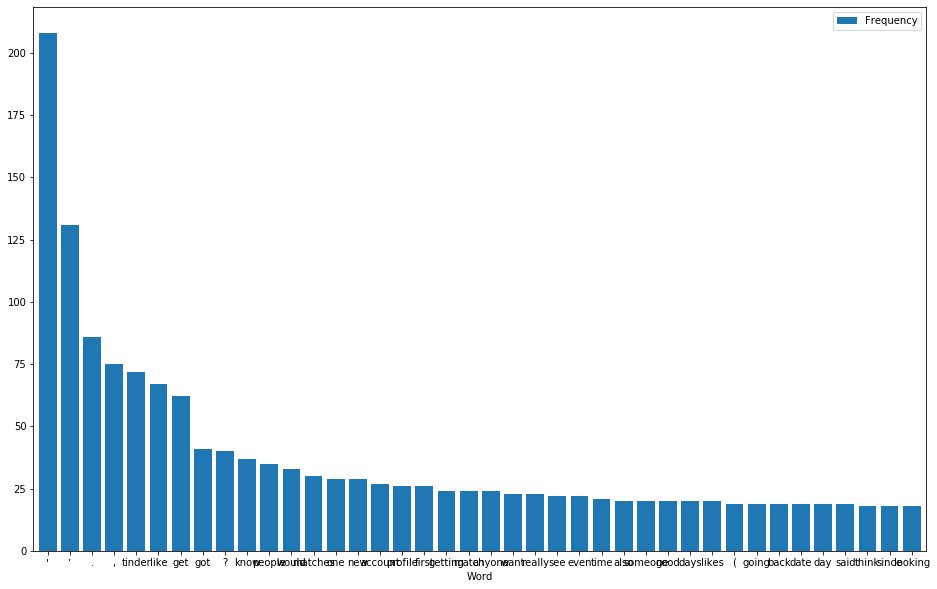

In [42]:
from collections import Counter
import pandas as pd
import nltk

top_N = 40

df = pd.read_csv('TFTS_df.csv',
                 usecols=['subreddit','posts'])

stopwords = nltk.corpus.stopwords.words('english')
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (df.posts
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

# plot
rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)

like , people , get ,anyone , said , profile words that appear both in the top 40 okcupid and tinder.


Then, we place the entire list of words and their counts into a DataFrame and proceed to sort them in descending order so that we can plot the corresponding bar plot out.

Next, we can do the same for our other subreddit, TINDER

(-0.5, 999.5, 749.5, -0.5)

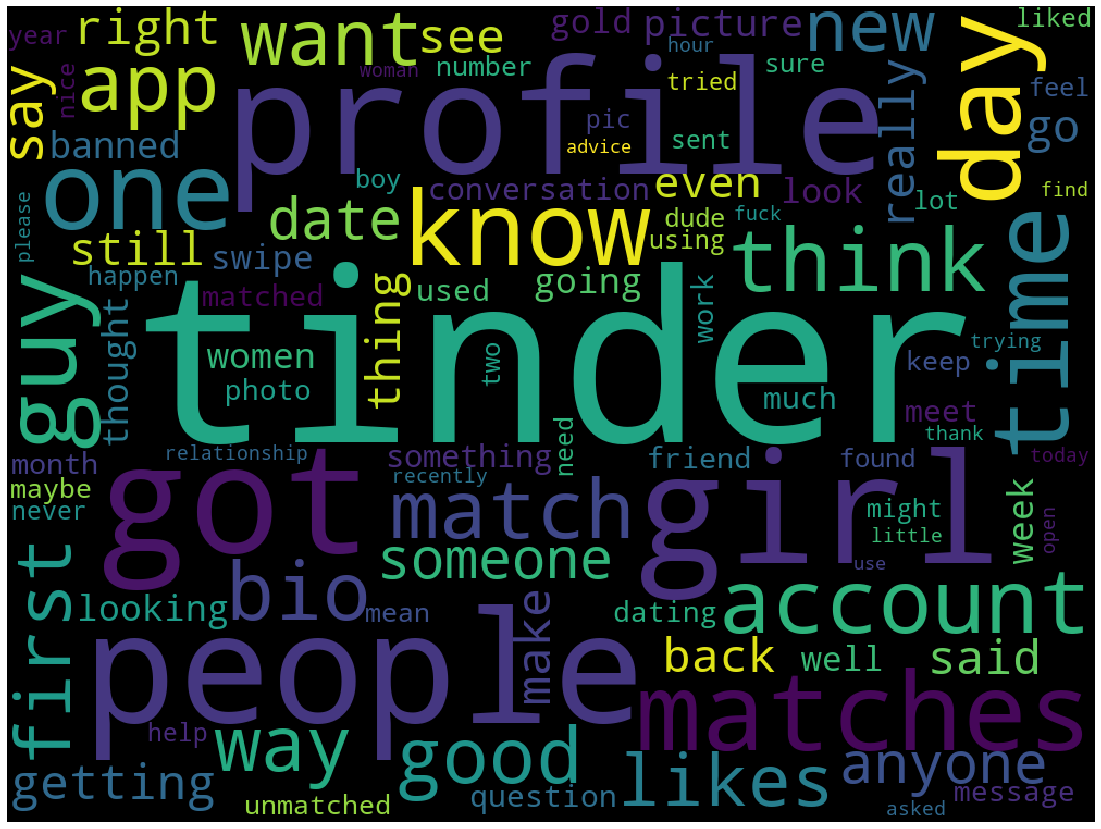

In [43]:
TFTS_text = ' '

en_stopwords = list(nltk.corpus.stopwords.words('english'))

for x in combined_df[combined_df['subreddit'] == 'tinder']['final_combined']: 
    for words in x: 
        TFTS_text = TFTS_text + words + ' '

TFTS_wc = WordCloud(max_words= 100,
                      width = 1000, 
                      height = 750,
                      background_color ='black',
                      stopwords=en_stopwords.extend(['x200b','amp']), 
                      contour_width=3, 
                      contour_color='red',
                      min_font_size = 10).generate(TFTS_text) 
                      
plt.figure(figsize = (20, 15)) 
plt.imshow(TFTS_wc) 
plt.axis("off")

### Now , we will remove the common words of the top 40 words that are similar in OKCUPID and TINDER.

In [44]:
combined_df

,names,titles,t_tokenized,t_stopped,t_final,posts,p_tokenized,p_stopped,p_final,subreddit,final_combined
0,t3_inzv03,idk what she was expecting me to say 🤕,"[idk, what, she, was, expecting, me, to, say]","[idk, expecting, say]","[idk, expecting, say]",,[],[],[],tinder,"[idk, expecting, say, ]"
1,t3_hz6lt2,Do you believe in fate?,"[do, you, believe, in, fate]","[believe, fate]","[believe, fate]","There is this guy I know, and admittedly have ...","[there, is, this, guy, i, know, and, admittedl...","[guy, know, admittedly, feelings, together, un...","[guy, know, admittedly, feelings, together, un...",okcupid,"[believe, fate, guy, know, admittedly, feeling..."
2,t3_in4wi7,Does OKC surface likes to the top of the swipe...,"[does, okc, surface, likes, to, the, top, of, ...","[okc, surface, likes, top, swipe, pile, like, ...","[okc, surface, likes, top, swipe, pile, like, ...",I found Tinder and Bumble would surface people...,"[i, found, tinder, and, bumble, would, surface...","[found, tinder, bumble, would, surface, people...","[found, tinder, bumble, would, surface, people...",okcupid,"[okc, surface, likes, top, swipe, pile, like, ..."
3,t3_i67md3,"are you comfortable video chatting, can you be...","[are, you, comfortable, video, chatting, can, ...","[comfortable, video, chatting]","[comfortable, video, chatting]",,[],[],[],okcupid,"[comfortable, video, chatting, ]"
4,t3_i8pacc,any of those affluent ladies hanging around he...,"[any, of, those, affluent, ladies, hanging, ar...","[affluent, ladies, hanging, around, absolutely...","[affluent, ladies, hanging, around, absolutely...",,[],[],[],okcupid,"[affluent, ladies, hanging, around, absolutely..."
...,...,...,...,...,...,...,...,...,...,...,...
1635,t3_ijn7nm,Profile critique,"[profile, critique]","[profile, critique]","[profile, critique]",I (28M) had been having some success a few mon...,"[i, m, had, been, having, some, success, a, fe...","[success, months, ago, stopped, using, okc, ti...","[success, months, ago, stopped, using, okc, ti...",okcupid,"[profile, critique, success, months, ago, stop..."
1636,t3_inzlfn,It’s nice to see people having a sense of humo...,"[it, s, nice, to, see, people, having, a, sens...","[nice, see, people, sense, humor, easily, brok...","[nice, see, people, sense, humor, easily, brok...",,[],[],[],tinder,"[nice, see, people, sense, humor, easily, brok..."
1637,t3_inrqy6,What’s with all the kims recently??,"[what, s, with, all, the, kims, recently]","[kims, recently]","[kims, recently]",,[],[],[],tinder,"[kims, recently, ]"
1638,t3_ipmpg0,"I think being a bad boy has its perks but, tha...","[i, think, being, a, bad, boy, has, its, perks...","[think, bad, boy, perks, definitely, work]","[think, bad, boy, perks, definitely, work]",,[],[],[],tinder,"[think, bad, boy, perks, definitely, work, ]"


In [45]:
# now we are going to remove the common words in the top 40 of OKCUPID and TINDER from our combined data frame.

def cleaner2(final_posts):
    stopwords2 = ['like' , 'people' , 'get' ,'anyone' , 'said', 'profile','one','someone','really']
    cleanser = [x for x in final_posts if x not in stopwords2]
    return(cleanser)



In [46]:
combined_df['final_combined'] = combined_df['final_combined'].map(cleaner2)



## Project 3 3. Modelling and Classification


In this notebook, we will be running several different models with different vectorizers and will be cross comparing between their training and testing scores to see how their scores compare up to each other.

Models:
  1. Logistic Regression Model and Count Vectorizer
  2. MultinomialNB Model and Count Vectorizer
  3. Logistic Regression Model and TfidfVectorizer
  4. MultinomialNB Model and TfidfVectorizer


After which, a Final Modelling Run will be run with the various best parameters of all the models and the corresponding scores, and some data between models will be generated for comparision, and then everything will be tabulated into a table for easy cross comparision and visualization.

Importing the relevant libraries for modelling and classification:

In [47]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression


In [48]:

df1 = pd.read_csv('combined_df.csv')

In [49]:
df1.head()

,Unnamed: 0,names,titles,t_tokenized,t_stopped,t_final,posts,p_tokenized,p_stopped,p_final,subreddit,final_combined
0,0,t3_inzv03,idk what she was expecting me to say 🤕,"['idk', 'what', 'she', 'was', 'expecting', 'me...","['idk', 'expecting', 'say']","['idk', 'expecting', 'say']",NaN,[''],[''],[''],tinder,"['idk', 'expecting', 'say', '']"
1,1,t3_hz6lt2,Do you believe in fate?,"['do', 'you', 'believe', 'in', 'fate']","['believe', 'fate']","['believe', 'fate']","There is this guy I know, and admittedly have ...","['there', 'is', 'this', 'guy', 'i', 'know', 'a...","['guy', 'know', 'admittedly', 'feelings', 'tog...","['guy', 'know', 'admittedly', 'feelings', 'tog...",okcupid,"['believe', 'fate', 'guy', 'know', 'admittedly..."
2,2,t3_in4wi7,Does OKC surface likes to the top of the swipe...,"['does', 'okc', 'surface', 'likes', 'to', 'the...","['okc', 'surface', 'likes', 'top', 'swipe', 'p...","['okc', 'surface', 'likes', 'top', 'swipe', 'p...",I found Tinder and Bumble would surface people...,"['i', 'found', 'tinder', 'and', 'bumble', 'wou...","['found', 'tinder', 'bumble', 'would', 'surfac...","['found', 'tinder', 'bumble', 'would', 'surfac...",okcupid,"['okc', 'surface', 'likes', 'top', 'swipe', 'p..."
3,3,t3_i67md3,"are you comfortable video chatting, can you be...","['are', 'you', 'comfortable', 'video', 'chatti...","['comfortable', 'video', 'chatting']","['comfortable', 'video', 'chatting']",NaN,[''],[''],[''],okcupid,"['comfortable', 'video', 'chatting', '']"
4,4,t3_i8pacc,any of those affluent ladies hanging around he...,"['any', 'of', 'those', 'affluent', 'ladies', '...","['affluent', 'ladies', 'hanging', 'around', 'a...","['affluent', 'ladies', 'hanging', 'around', 'a...",NaN,[''],[''],[''],okcupid,"['affluent', 'ladies', 'hanging', 'around', 'a..."


### Naive-Bayes Classifier (Multinomial Model) with Count-Vectorizer
First, we turn subreddit into a 1/0 column, where 1 indicates Okcupid.

In [50]:
df1['okcupid'] = [1 if df1.loc[i,'subreddit'] == 'okcupid' else 0 for i in range(df1.shape[0])]

In [51]:

df1['okcupid'].value_counts()

1    906
0    734
Name: okcupid, dtype: int64

In [52]:
df1.head(3)

,Unnamed: 0,names,titles,t_tokenized,t_stopped,t_final,posts,p_tokenized,p_stopped,p_final,subreddit,final_combined,okcupid
0,0,t3_inzv03,idk what she was expecting me to say 🤕,"['idk', 'what', 'she', 'was', 'expecting', 'me...","['idk', 'expecting', 'say']","['idk', 'expecting', 'say']",NaN,[''],[''],[''],tinder,"['idk', 'expecting', 'say', '']",0
1,1,t3_hz6lt2,Do you believe in fate?,"['do', 'you', 'believe', 'in', 'fate']","['believe', 'fate']","['believe', 'fate']","There is this guy I know, and admittedly have ...","['there', 'is', 'this', 'guy', 'i', 'know', 'a...","['guy', 'know', 'admittedly', 'feelings', 'tog...","['guy', 'know', 'admittedly', 'feelings', 'tog...",okcupid,"['believe', 'fate', 'guy', 'know', 'admittedly...",1
2,2,t3_in4wi7,Does OKC surface likes to the top of the swipe...,"['does', 'okc', 'surface', 'likes', 'to', 'the...","['okc', 'surface', 'likes', 'top', 'swipe', 'p...","['okc', 'surface', 'likes', 'top', 'swipe', 'p...",I found Tinder and Bumble would surface people...,"['i', 'found', 'tinder', 'and', 'bumble', 'wou...","['found', 'tinder', 'bumble', 'would', 'surfac...","['found', 'tinder', 'bumble', 'would', 'surfac...",okcupid,"['okc', 'surface', 'likes', 'top', 'swipe', 'p...",1


In [53]:
X = df1['final_combined']
y = df1['okcupid']

In [54]:
X.head()

0                      ['idk', 'expecting', 'say', '']
1    ['believe', 'fate', 'guy', 'know', 'admittedly...
2    ['okc', 'surface', 'likes', 'top', 'swipe', 'p...
3             ['comfortable', 'video', 'chatting', '']
4    ['affluent', 'ladies', 'hanging', 'around', 'a...
Name: final_combined, dtype: object

In [55]:

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

### BASELINE SCORE of the two subreddits

In [56]:
y_test.value_counts(normalize =True)

1    0.55122
0    0.44878
Name: okcupid, dtype: float64

### We then can instantiate CountVectorizer and instantiate our NB pipeline.

In [57]:
naive_bayes = Pipeline([('cvec', CountVectorizer()), 
                        ('multi_nb', MultinomialNB())])

In [58]:
naive_bayes.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('multi_nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

Then we go on to predict y using X_test.

In [59]:
naive_ypred = naive_bayes.predict(X_test)

We then can check our scores against our training and testing sets above.

In [60]:

naive_bayes.score(X_train, y_train)

0.9105691056910569

In [61]:

naive_bayes.score(X_test, y_test)

0.7292682926829268

Both our training and testing scores are similar and does not show a little over-fitting  However, we can use GridSearchCV to help us search for the best parameters for our NB model in the next portion.

WE are selecting MultinomialNB 
and why?
The columns of X are all integer counts, so MultinomialNB is the best choice here.
BernoulliNB is best when we have 0/1 counts in all columns of X. (a.k.a. dummy variables)
GaussianNB is best when the columns of X are Normally distributed. (Practically, though, it gets used whenever BernoulliNB and MultinomialNB are inappropriate.)


### Naive-Bayes Classifier (Multinomial Model) GridSearchCV, Count-Vectorizer
First, we initialize the pipe parameters to be fed into our GridSearchCV as shown below.

In [62]:
pipe_params = {
    'cvec__max_features': [2500, 3000, 3500],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)]
}

In [63]:
nb_grid = GridSearchCV(naive_bayes,
                       param_grid=pipe_params,
                       scoring='accuracy'
                      )


Fitting our training data to GridSearchCV model....

In [64]:
nb_grid.fit(X_train, y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        p

In [65]:

print(nb_grid.best_score_)

0.7195121951219512


In [66]:
nb_grid.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 3000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2)}


We can now instantiate NB model with best parameters for CountVectorize

In [67]:
naive_bayes = Pipeline([('cvec', CountVectorizer(ngram_range = (1,2),
                                                 max_features = 3000,
                                                 max_df = 0.9,
                                                 min_df = 2)), 
                        ('multi_nb', MultinomialNB())])

In [68]:
naive_bayes.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.9,
                                 max_features=3000, min_df=2,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('multi_nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [69]:
print(f'Score on training set: {naive_bayes.score(X_train, y_train)}')
print(f'Score on testing set: {naive_bayes.score(X_test, y_test)}')

Score on training set: 0.8601626016260162
Score on testing set: 0.7341463414634146


Naive-Bayes Classifier (Multinomial Model) GridSearchCV, Tfidf-Vectorizer
Here we use Tfidf-Vectorizer instead of Count-Vectorizer and see what impact it has on our data set.

### Why Use TF-IDF?
Common words are penalized.
Rare words have more influence.

In [70]:
naive_bayes = Pipeline([('vector',TfidfVectorizer()), 
                        ('multi_nb', MultinomialNB())])

In [71]:
pipe_params = {
    'vector__max_df':[0.9,0.95],
    'vector__min_df':[0.0001,0.001,0.01],
    'vector__ngram_range':[(1,1),(1,2),(1,3),(1,4),(1,5)]
}


In [72]:
nb_grid = GridSearchCV(naive_bayes,
                       param_grid=pipe_params,
                       scoring='accuracy'
                      )


In [73]:
nb_grid.fit(X_train, y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vector',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                     

In [74]:

nb_grid.best_params_

{'vector__max_df': 0.9, 'vector__min_df': 0.01, 'vector__ngram_range': (1, 1)}

In [75]:

nb_grid.best_score_

0.7089430894308943

As seen above, we will use default values for our BaseLine NB model first.

We will fit our training data first to our NB pipeline.


Similar to above, we instantiate a new NB model with our best parameters.

In [76]:
naive_bayes = Pipeline([('vector',TfidfVectorizer(ngram_range=(1,2),
                                                     min_df=0.01,
                                                     max_df=0.9)),
                            ('multi_nb', MultinomialNB())
                           ])

In [77]:

naive_bayes

Pipeline(memory=None,
         steps=[('vector',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.9, max_features=None,
                                 min_df=0.01, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multi_nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)


## GridSearch for Best Parameters:
And then we can proceed to use this GridSearch function below to find our best parameters for the different models we will be initializing.

In [78]:

df1['okcupid'].value_counts()

1    906
0    734
Name: okcupid, dtype: int64

In [79]:
X = df1['final_combined']
y = df1['okcupid']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

In [81]:
def grid_searcher(X, y, vectorizer, model):
    
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.25,
                                                        random_state=42,
                                                        stratify=y)
    
    full_name_dict = {'cvec' : 'Count Vectorizer',
                      'tvec' : 'TfidfVectorizer',
                      'multi_nb' : 'MultinomialNB',
                      'lr' : 'Logistic Regression',
                      'dt' : 'Decision Tree Classifier',
                      'rf': 'Random Forest Classifier'}
    
    vec_dict =  {'cvec': CountVectorizer(),
                 'tvec': TfidfVectorizer()
                }
    
    param_dict = {'cvec': {'cvec__max_features': [2500, 3500],
                           'cvec__min_df': [2, 3],
                           'cvec__max_df': [.9, .95],
                           'cvec__ngram_range': [(1,1), (1,2)]},
                  'tvec': {'tvec__max_features': [2500,3000,3500],
                           'tvec__min_df':[2,3],
                           'tvec__max_df':[.9,.95],
                           'tvec__ngram_range':[(1,1),(1,2)]},
                  'dt' : {'dt__max_depth': [3,5],
                          'dt__min_samples_split': [5,10],
                          'dt__min_samples_leaf': [2,3]},
                  'rf' : {'rf__n_estimators': [100],
                          'rf__max_depth': [None, 1, 2],
                          'rf__min_samples_split': [5,10],
                          'rf__min_samples_leaf': [2,3]},
                  'lr' : {},
                  'multi_nb' : {}
                 }

    model_dict = {'multi_nb' : MultinomialNB(),
                  'lr' : LogisticRegression(),
                  'dt' : DecisionTreeClassifier(),
                  'rf' : RandomForestClassifier()
                  }
    
    pipe = Pipeline([(vectorizer, vec_dict[vectorizer]), 
                    ((model, model_dict[model]))])
    
    
    param_dict[model].update(param_dict[vectorizer])
    pipe_params = param_dict[model]
    
    grid = GridSearchCV(pipe,
           param_grid=pipe_params,
           cv=3)
        
    grid.fit(X_train, y_train)
    
    print(f'Using {full_name_dict[model]} Model and {full_name_dict[vectorizer]}:')
    print(f'Model train score : {grid.best_score_}')
    print(f'Model test score : {grid.score(X_test,y_test)}')
    print(f'Model best params : {grid.best_params_}')


GridSearchCV for Logistic Regression and CountVectorizer:

In [82]:
grid_searcher(X,y,'cvec','lr')

Using Logistic Regression Model and Count Vectorizer:
Model train score : 0.8235772357723578
Model test score : 0.8390243902439024
Model best params : {'cvec__max_df': 0.9, 'cvec__max_features': 2500, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2)}



GridSearchCV for MultinomialNB and CountVectorizer:

In [83]:
grid_searcher(X,y,'cvec','multi_nb')

Using MultinomialNB Model and Count Vectorizer:
Model train score : 0.7260162601626016
Model test score : 0.7341463414634146
Model best params : {'cvec__max_df': 0.9, 'cvec__max_features': 2500, 'cvec__min_df': 3, 'cvec__ngram_range': (1, 1)}


GridSearchCV for Logistic Regression and TfidfVectorizer:

In [84]:
grid_searcher(X,y,'tvec','lr')


Using Logistic Regression Model and TfidfVectorizer:
Model train score : 0.8138211382113821
Model test score : 0.8341463414634146
Model best params : {'tvec__max_df': 0.9, 'tvec__max_features': 2500, 'tvec__min_df': 2, 'tvec__ngram_range': (1, 1)}



GridSearchCV for MultinomialNB and TfidfVectorizer:

In [85]:
grid_searcher(X,y,'tvec','multi_nb')

Using MultinomialNB Model and TfidfVectorizer:
Model train score : 0.7195121951219511
Model test score : 0.7317073170731707
Model best params : {'tvec__max_df': 0.9, 'tvec__max_features': 2500, 'tvec__min_df': 3, 'tvec__ngram_range': (1, 2)}


Logistic Regression with CountVectorizer semes to give the best training and test scores.
MultinomialNB model together with CountVectorizer seems to give the best training and test scores.

### Final Modelling Runs:
Finally, we can use our best parameters found using GridSearch to initialize various models with best parameters and run our predictions on our test data and interpret the results correspondingly below.


### Final Logistic Regression with CountVectorizer model:

In [86]:
lr_cvec_fin = Pipeline([('cvec',CountVectorizer(max_df = 0.9, 
                                                max_features = 2500, 
                                                min_df = 3,
                                                ngram_range = (1, 1))),
                        ('lr', LogisticRegression())])

In [87]:
lr_cvec_fin.fit(X_train,y_train)

lr_cvec_ypred_fin = lr_cvec_fin.predict(X_test)
lr_cvec_fin_acc = accuracy_score(y_test,lr_cvec_ypred_fin)

print(f'Accuracy: {lr_cvec_fin_acc}')
print(classification_report(y_test,lr_cvec_ypred_fin,target_names=['okcupid','tinder']))

Accuracy: 0.8536585365853658
              precision    recall  f1-score   support

     okcupid       0.79      0.92      0.85       184
      tinder       0.92      0.80      0.86       226

    accuracy                           0.85       410
   macro avg       0.86      0.86      0.85       410
weighted avg       0.86      0.85      0.85       410



In [88]:
tn, fp, fn, tp = confusion_matrix(y_test, lr_cvec_ypred_fin).ravel()

print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 169
False Positives: 15
False Negatives: 45
True Positives: 181


In [89]:
acc = (tp+tn)/(tn+fp+fn+tp)
print('The Accuracy rate is '+ str(acc))

The Accuracy rate is 0.8536585365853658


In [90]:
err = (fp+fn)/(tn+fp+fn+tp)
print('The Error rate is '+ str(err))

The Error rate is 0.14634146341463414


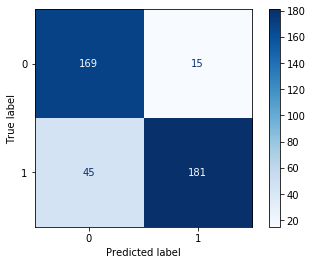

In [91]:

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr_cvec_fin , X_test, y_test, cmap='Blues', values_format='d');

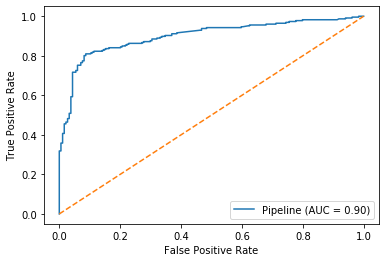

In [92]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(lr_cvec_fin, X_test, y_test);

plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

### Since `okcupid` = 1, in this case:

183 posts were correctly predicted by this model to be from Okcupid.
20posts were wrongly predicted by this model to be from OKcupid.
44posts were wrongly predicted by this model to be from tinder.
160 posts were correctly predicted by this model to be from tinder.


### Final Logistic Regression with TfidfVectorizer model:

In [93]:
lr_tvec_fin = Pipeline([('tvec',TfidfVectorizer(max_df = 0.9, 
                                                max_features = 2500, 
                                                min_df = 3,
                                                ngram_range = (1, 1))),
                        ('lr', LogisticRegression())])

In [94]:

lr_cvec_ypred_fin = lr_cvec_fin.predict(X_train)

In [95]:
lr_tvec_fin.fit(X_train,y_train)

lr_tvec_ypred_fin = lr_tvec_fin.predict(X_test)
lr_tvec_fin_acc = accuracy_score(y_test,lr_tvec_ypred_fin)

print(f'Accuracy: {lr_tvec_fin_acc}')
print(classification_report(y_test,lr_tvec_ypred_fin,target_names=['okcupid','tinder']))

Accuracy: 0.824390243902439
              precision    recall  f1-score   support

     okcupid       0.81      0.80      0.80       184
      tinder       0.84      0.85      0.84       226

    accuracy                           0.82       410
   macro avg       0.82      0.82      0.82       410
weighted avg       0.82      0.82      0.82       410



In [96]:
tn, fp, fn, tp = confusion_matrix(y_test, lr_tvec_ypred_fin).ravel()

print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 147
False Positives: 37
False Negatives: 35
True Positives: 191


In [97]:
acc = (tp+tn)/(tn+fp+fn+tp)
print('The Accuracy rate is '+ str(acc))

The Accuracy rate is 0.824390243902439


In [98]:
err = (fp+fn)/(tn+fp+fn+tp)
print('The Error rate is '+ str(err))

The Error rate is 0.17560975609756097


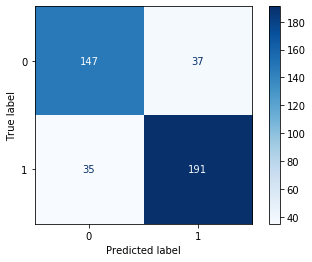

In [99]:

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr_tvec_fin , X_test, y_test, cmap='Blues', values_format='d');

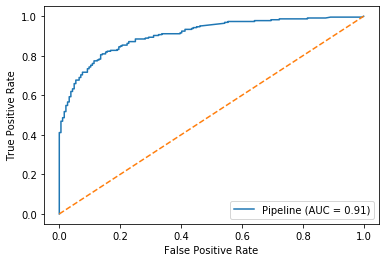

In [100]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(lr_tvec_fin, X_test, y_test);

plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

In [101]:

auc = roc_auc_score(y_test,  lr_tvec_ypred_fin)

In [102]:
auc

0.8220228934205462

101 posts were correctly predicted by this model to be from OKCUPID.
10 posts were wrongly predicted by this model to be from OKCUPID.
3 posts were wrongly predicted by this model to be from Tinder.
241 posts were correctly predicted by this model to be from Tinder.


### Final MultinomialNB with CountVectorizer model:¶

In [103]:
confusion_matrix(y_train, lr_cvec_ypred_fin)

array([[544,   6],
       [ 51, 629]])

In [104]:
nb_cvec_fin = Pipeline([('cvec',CountVectorizer(max_df = 0.9, 
                                                max_features = 2500, 
                                                min_df = 2,
                                                ngram_range = (1, 2))),
                        ('multi_nb', MultinomialNB())])

In [105]:
nb_cvec_fin.fit(X_train,y_train)

nb_cvec_ypred_fin = nb_cvec_fin.predict(X_test)
nb_cvec_fin_acc = accuracy_score(y_test,nb_cvec_ypred_fin)

print(f'Accuracy: {nb_cvec_fin_acc}')
print(classification_report(y_test,nb_cvec_ypred_fin,target_names=['okcupid','tinder']))


Accuracy: 0.724390243902439
              precision    recall  f1-score   support

     okcupid       0.74      0.59      0.66       184
      tinder       0.71      0.83      0.77       226

    accuracy                           0.72       410
   macro avg       0.73      0.71      0.71       410
weighted avg       0.73      0.72      0.72       410



In [106]:
tn, fp, fn, tp = confusion_matrix(y_test, nb_cvec_ypred_fin).ravel()

print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 109
False Positives: 75
False Negatives: 38
True Positives: 188


In [107]:
acc = (tp+tn)/(tn+fp+fn+tp)
print('The Accuracy rate is '+ str(acc))

The Accuracy rate is 0.724390243902439


In [108]:
err = (fp+fn)/(tn+fp+fn+tp)
print('The Error rate is '+ str(err))

The Error rate is 0.275609756097561


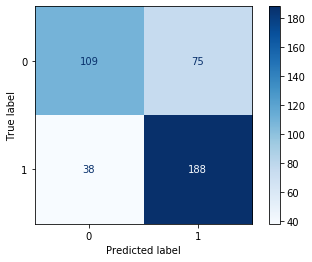

In [109]:


plot_confusion_matrix(nb_cvec_fin , X_test, y_test, cmap='Blues', values_format='d');

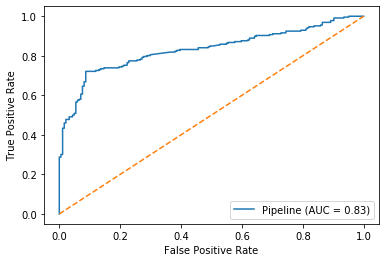

In [110]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(nb_cvec_fin, X_test, y_test);

plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

In [111]:
auc = roc_auc_score(y_test,  nb_cvec_ypred_fin)

In [112]:
auc

0.7121248557137361

In this project, we are trying to identify posts with words that belong to either 'OKcupid' or 'Tinder' subreddit. After webscraping the subreddits for data, we preprocessed it and we built a Logistic Regression model as well as a Multinomial Naive Bayes model to train the data. Both models performed fairly well with 0.86 accuracy rate for Logistic Regression and 0.76 for Multinomial Naive Bayes model but we select the Logistic Regression Model with Count Vectorizer to accurately predict our text whether it comes from the OKCUPID thread as it has a high accuracy rate of 86%.

For the Receiver Operating Characteristic Curve above, we want the yellow line to be as far away from the blue line as much as possible which is also represented as the Area Under Curve. The AUC for the above ROC is 0.84 which means that it is quite accurate for our LOGISTIC regression model and does better than our Multinomial Naive Bayes model of 0.74.

### Final MultinomialNB with TfidfVectorizer model:

In [113]:
nb_tvec_fin = Pipeline([('tvec',TfidfVectorizer(max_df = 0.9, 
                                                max_features = 2500, 
                                                min_df = 3,
                                                ngram_range = (1, 2))),
                         ('multi_nb', MultinomialNB())])

In [114]:
nb_tvec_fin.fit(X_train,y_train)

nb_tvec_ypred_fin = nb_tvec_fin.predict(X_test)
nb_tvec_fin_acc = accuracy_score(y_test,nb_tvec_ypred_fin)

print(f'Accuracy: {nb_tvec_fin_acc}')
print(classification_report(y_test,nb_tvec_ypred_fin,target_names=['Okcupid','Tinder']))


Accuracy: 0.7317073170731707
              precision    recall  f1-score   support

     Okcupid       0.82      0.51      0.63       184
      Tinder       0.70      0.91      0.79       226

    accuracy                           0.73       410
   macro avg       0.76      0.71      0.71       410
weighted avg       0.75      0.73      0.72       410



In [115]:

tn, fp, fn, tp = confusion_matrix(y_test, nb_tvec_ypred_fin).ravel()

print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 94
False Positives: 90
False Negatives: 20
True Positives: 206


In [116]:
acc = (tp+tn)/(tn+fp+fn+tp)
print('The Accuracy rate is '+ str(acc))

The Accuracy rate is 0.7317073170731707


In [117]:
err = (fp+fn)/(tn+fp+fn+tp)
print('The Error rate is '+ str(err))

The Error rate is 0.2682926829268293


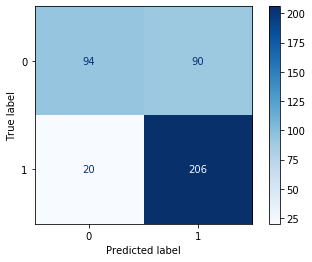

In [118]:

plot_confusion_matrix(nb_tvec_fin , X_test, y_test, cmap='Blues', values_format='d');

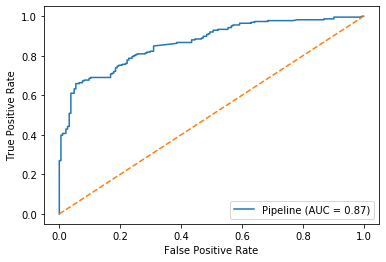

In [119]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(nb_tvec_fin, X_test, y_test);

plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

### Examine the wrongly classified posts

we put the multinomial naive bayes model with TFID vectorizr model and see the wrongly predicted posts.

In [120]:
pred_df=pd.DataFrame(y_test)
pred_df["text"]=X_test
pred_df['pred']=nb_tvec_ypred_fin
#pred_df.loc[pred_df['subreddit']!=pred_df['pred'],:]
pred_df

,okcupid,text,pred
203,1,"['weird', 'used', 'okc', 'months', 'recently',...",1
156,1,"['wokefish', 'dating', 'trend', 'shady', 'men'...",1
919,0,"['ever', 'met', 'girl', 'dreams', '']",1
1379,1,"['best', 'meet', 'daddies', 'lot', 'apps', 'ok...",1
48,0,"['fruit', 'loop', '']",1
...,...,...,...
1595,1,"['cj', 'could', 'one', 'super', 'power', 'rela...",1
1545,0,"['gonna', 'swipe', 'creasing', 'air', 'forces'...",0
927,1,"['cj', 'looking', 'forward', 'weekend', '']",1
1068,1,"['attitude', 'flakes', 'free', 'time', 'whatev...",1


In [121]:
pred_df.loc[pred_df['okcupid']!=pred_df['pred'],:]

,okcupid,text,pred
919,0,"['ever', 'met', 'girl', 'dreams', '']",1
48,0,"['fruit', 'loop', '']",1
501,0,"['actually', 'gave', 'number', '']",1
557,0,"['harsh', 'reality', '']",1
146,0,"['christian', 'bdsm', '']",1
...,...,...,...
803,0,"['motorcycle', 'ride', 'sex', '']",1
309,0,"['decided', 'share', '']",1
1608,0,"['matchmaking', 'data', 'survey', 'hi', 'wante...",1
1268,0,"['classy', '']",1


In [122]:
pd.set_option('display.max_columns', None)

In [123]:
pd.set_option('display.max_colwidth', None)

In [124]:
pred_df

,okcupid,text,pred
203,1,"['weird', 'used', 'okc', 'months', 'recently', 'got', 'relationship', 'like', 'fuck', 'come', 'find', 'account', 'banned', 'really', 'sure', 'considering', 'months', 'step', 'line', 'talking', 'people', 'happened', 'anyone', 'else']",1
156,1,"['wokefish', 'dating', 'trend', 'shady', 'men', 'pretending', 'progressive', 'apps', '']",1
919,0,"['ever', 'met', 'girl', 'dreams', '']",1
1379,1,"['best', 'meet', 'daddies', 'lot', 'apps', 'okcupid', 'seems', 'good', 'reviews', 'wondering', 'best', 'meet', 'daddies', 'years', 'old', 'doctor', 'algeria', 'handsome', 'cute', 'smart', 'caring', 'cm', 'kg', 'looking', 'cute', 'manly', 'looking', 'daddy', 'chat', 'eventually', 'still', 'live', 'algeria', 'willing', 'relocate', 'worth']",1
48,0,"['fruit', 'loop', '']",1
...,...,...,...
1595,1,"['cj', 'could', 'one', 'super', 'power', 'related', 'dating', 'would', '']",1
1545,0,"['gonna', 'swipe', 'creasing', 'air', 'forces', 'big', 'turn', '']",0
927,1,"['cj', 'looking', 'forward', 'weekend', '']",1
1068,1,"['attitude', 'flakes', 'free', 'time', 'whatever', 'want', 'make', 'life', 'awesome', 'flaking', 'becomes', 'good', 'thing']",1


In [125]:
combined_df.loc[540,'final_combined']

['another', 'charming', 'man', '']

In [126]:
combined_df.loc[609,'final_combined']

['disco', 'little', 'things', 'racket', 'sexual', 'tension', 'date', '']

In [127]:
pred_df.loc[pred_df['okcupid']!=pred_df['pred'],:]

,okcupid,text,pred
919,0,"['ever', 'met', 'girl', 'dreams', '']",1
48,0,"['fruit', 'loop', '']",1
501,0,"['actually', 'gave', 'number', '']",1
557,0,"['harsh', 'reality', '']",1
146,0,"['christian', 'bdsm', '']",1
...,...,...,...
803,0,"['motorcycle', 'ride', 'sex', '']",1
309,0,"['decided', 'share', '']",1
1608,0,"['matchmaking', 'data', 'survey', 'hi', 'wanted', 'get', 'better', 'understanding', 'matchmaking', 'apps', 'readily', 'available', 'today', 'could', 'take', 'two', 'minutes', 'fill', 'survey', 'would', 'extremely', 'helpful', 'thank']",1
1268,0,"['classy', '']",1


In [128]:
pred_df.to_csv("pred_df.csv")


### Models Score Tabulation:

We chose the model of logistic regression with count vectorizer as it has the highest accuracy and best ROC AUC score of 81% accuracy of predicting okcupid and 0.89

### Conclusions and Recommendations

We will use logistic regression with countvectorizer to predict if a person talking is talking towards more long term relationship dating than short term dating.

this is done by predicting the posts relative to Okcupid and assuming okcupid subreddits talk more about relationship material

We could also do sentiment analysis and do more testing on different posts about relationship and short term dating.